<a href="https://colab.research.google.com/github/atstuyuki/yolov5/blob/master/yolov5_detect_on_colab__cts_20220621.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#google colab上でYolov5の環境のセットアップ

In [1]:
#@title
!git clone https://github.com/atstuyuki/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12187, done.
remote: Total 12187 (delta 0), reused 0 (delta 0), pack-reused 12187
Receiving objects: 100% (12187/12187), 24.54 MiB | 28.14 MiB/s, done.
Resolving deltas: 100% (8435/8435), done.


In [2]:
#@title
#!git clone https://github.com/ultralytics/yolov5 #本家からクローンする場合
%cd yolov5
%pip install -qr requirements.txt

import torch
from IPython.display import Image, clear_output

clear_output()
#セットUPが終了すればクラウト上のマシンのスペックを表示する

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

# Setup complete. Using torch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)

Setup complete. Using torch 1.11.0+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


#ロード済みデータでyolov5の動作確認
ジダンが検出されればＯＫ

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-249-gad5399e Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:00<00:00, 131MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.017s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.017s)
Speed: 0.5ms pre-process, 17.1ms inference, 21.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


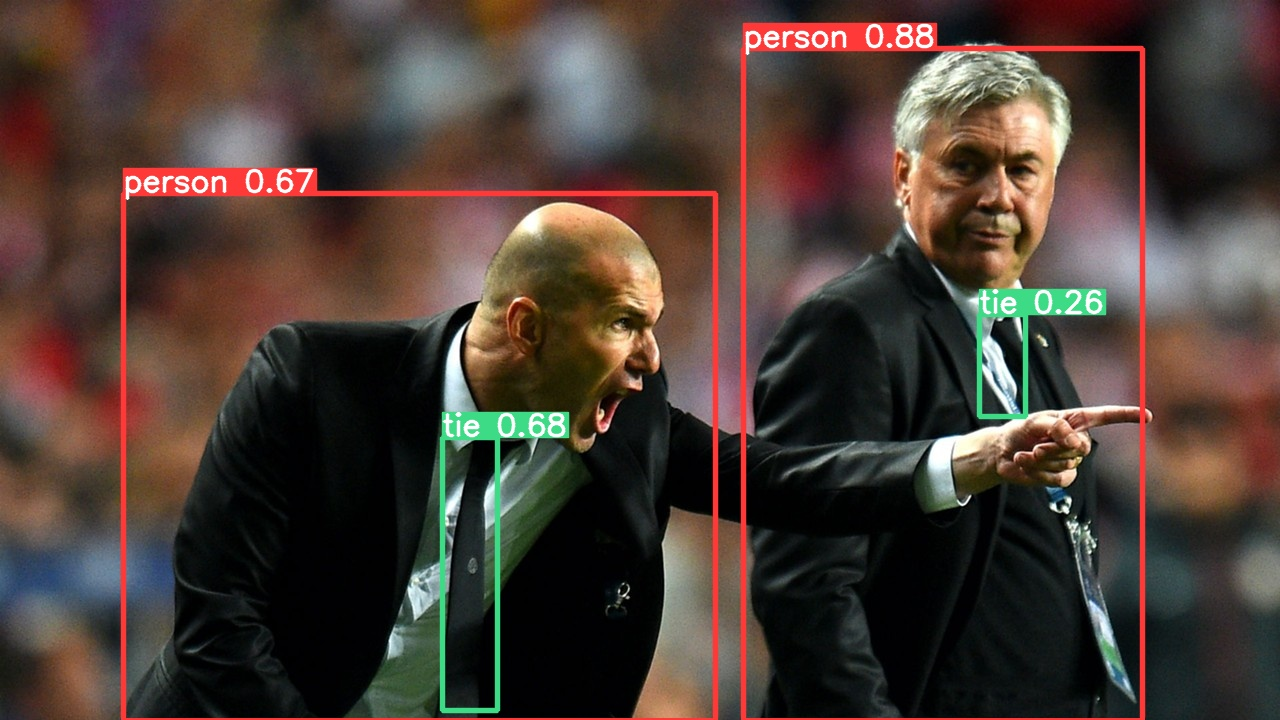

In [3]:
#@title
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/zidane.jpg', width=600)

In [21]:
#@title
#google colabのマウント
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

#検出作業 動画をuploadする
aviファイルは思いのでMP4に変換しておく　ビデオの解像度は960x720 fps=30にしておくとあとでキャリブレーションが楽


In [5]:
#@title
#手元の動画をgoogle colabにupload MP4形式

from google.colab import files
import os
uploaded = files.upload()
#uploadedは辞書型なのでファイル名を取り出し、絶対パスを取得してfullpathという変数を当てる
for k in uploaded.keys():
  print('file name:',k)
fullpath_movie=os.path.abspath(k)
print('fullpath:',fullpath_movie)

Saving normal_median_nerve2.mp4 to normal_median_nerve2.mp4
file name: normal_median_nerve2.mp4
fullpath: /content/yolov5/normal_median_nerve2.mp4


#ビデオのサイズ・フレームレートの確認  


In [6]:
#@title
import cv2
source_movie=os.path.basename(fullpath_movie)
print(source_movie)
cap = cv2.VideoCapture(source_movie)
# 横幅(width)
width=cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f"width: {cap.get(cv2.CAP_PROP_FRAME_WIDTH)}")
# 高さ(height)
height=cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print(f"height: {cap.get(cv2.CAP_PROP_FRAME_HEIGHT)}")
# フレームレート
print(f"fps: {cap.get(cv2.CAP_PROP_FPS)}")

normal_median_nerve2.mp4
width: 774.0
height: 510.0
fps: 30.0


#動画の中の10㎜の距離のcalibration*


動画の１枚目のフレームを静止画として保存

In [7]:
#@title
def save_frame(video_path, frame_num, result_path):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        return

    os.makedirs(os.path.dirname(result_path), exist_ok=True)

    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

    ret, frame = cap.read()

    if ret:
        cv2.imwrite(result_path, frame)
#uploadしたファイルの最初のフレーム（０フレーム目）をフォルダに1st imageとして保存
save_frame(fullpath_movie, 0, './1st_image.jpg')

#imageを表示、サイズと座標を確認
画像の切り出し時に縮小かけていなければaplio300で撮像した手根管の画像なら10mm=200pixとなっているはず
1mm=20pix

# マウスオーバーして座標と長さを確認してください　



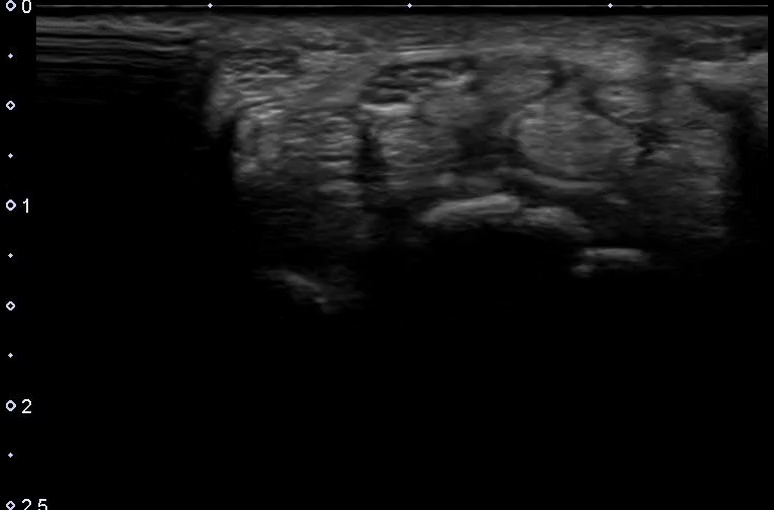

In [8]:
#@title
img = cv2.imread('1st_image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
import plotly.graph_objects as go
from skimage import data
from PIL import Image
import base64
from io import BytesIO

#img = data.src()  # numpy array
pil_img = Image.fromarray(img) # PIL image object
prefix = "data:image/png;base64,"
with BytesIO() as stream:
    pil_img.save(stream, format="png")
    base64_string = prefix + base64.b64encode(stream.getvalue()).decode("utf-8")
fig = go.Figure(go.Image(source=base64_string))
fig.show()

#スライダーバーで10mmあたりのピクセル数を指定
マウスまたは→　←で調整可能

In [23]:

number_slider = 200 #@param {type:"slider", min:-1, max:500, step:1}
carib_ratio=10/number_slider#1pixel当たりの長さ(mm)
print('10mm あたりのピクセル数は:',number_slider)
print('1pixelあたりの長さ(mm)は:',carib_ratio)

10mm あたりのピクセル数は: 200
1pixelあたりの長さ(mm)は: 0.05


UPLOADしたファイルの名前を変えておく

In [10]:
import os
 # 変更前ファイル
source_movie
 # 変更後ファイル
rename= 'renamed.mp4'
 # ファイル名の変更 
os.rename(source_movie, rename) 
 # ファイルの存在確認 
print(os.path.exists(rename))

True


#名前をrenamed.mp4に変更した動画に対して検出を実行
#検出座標はdetect/exp(xx)/labels/detection resultフォルダにtextファイルに格納される

In [11]:
!python detect.py --source renamed.mp4  --weights last.pt --conf 0.5 --save-txt  --save-conf  --exist-ok

detect: weights=['last.pt'], source=renamed.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-249-gad5399e Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients
video 1/1 (1/166) /content/yolov5/renamed.mp4: 448x640 1 normal, Done. (0.015s)
video 1/1 (2/166) /content/yolov5/renamed.mp4: 448x640 1 normal, Done. (0.010s)
video 1/1 (3/166) /content/yolov5/renamed.mp4: 448x640 1 normal, Done. (0.010s)
video 1/1 (4/166) /content/yolov5/renamed.mp4: 448x640 1 normal, Done. (0.010s)
video 1/1 (5/166) /content/yolov5/renamed.mp4: 448x640 1 normal, Done. (0.010s)
video 

#検出結果の動画を再生する→ここがうまくいかないので今はスキップ！

In [ ]:
#@title
# --- mp4動画の再生 ---
from IPython.display import HTML
from base64 import b64encode

mp4 = open('renamed.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="85%" height="85%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

#検出された座標一覧がruns/detext/exp/labelsフォルダに入っているので、globでフォルダ内のtextファイル全部を取得し、notsortで整数番号順に並べ替える

In [12]:
#@title
import glob
from natsort import natsorted
%cd '/content/yolov5/runs/detect/exp/labels'

datalist=glob.glob('*.txt')
datalist= natsorted(datalist)

/content/yolov5/runs/detect/exp/labels


#finaldataというデータフレームに[クラス,xmin,ymin, xmax, ymax, 精度]を格納する
#labelフォルダのdetction results.csvおよび
#原点補正した神経の座標はnerve corrdinate.csvに格納

In [13]:
#@title
import pandas as pd
datalist_head=[ ]
for name in datalist:
  df=pd.read_csv(name, header=None, delim_whitespace=True)
  datalist_head.append(df)
finaldata=pd.concat(datalist_head,axis=0,ignore_index=True)
#detection result csvにデータを保管
import numpy as np
np.savetxt('detection result.csv',finaldata,delimiter = ',',fmt = '%s')

In [18]:
#@title
#x_minとx_max, y_minとy_maxの座標の中点よりBBOXの中心座標を求める
#ビデオの画面のサイズに合わせて掛け算　実測値を知りたいときはビデオ画面のサイズが何mmかキャリブレーション必要
nerve_x=(finaldata.iloc[:,1]+finaldata.iloc[:,3])/2*width
carib_nerve_x=nerve_x*carib_ratio#単位をmmに直す
nerve_y=(finaldata.iloc[:,2]+finaldata.iloc[:,4])/2*height
carib_nerve_y=nerve_y*carib_ratio# 単位をmmに直す
#time frameをｚ軸とするためにlength_listを作成する
length=len(nerve_x)
length_list=list(range(length))
#最初のフレームで神経が検出された位置を原点として0点補正を行う
zero_x=np.full(length,carib_nerve_x[0])
zero_y=np.full(length,carib_nerve_y[0])

carib_nerve_x=carib_nerve_x - zero_x
carib_nerve_y=carib_nerve_y - zero_y

#time frameとx座標、ｙ座標のデータをCSVに保管する
length_list=pd.Series(length_list)#リストをpd.Seriesに変換
df_corrdinate = pd.concat([length_list, carib_nerve_x], axis=1)
df_corrdinate = pd.concat([df_corrdinate, carib_nerve_y], axis=1)

np.savetxt('nerve_corrdinates.csv',df_corrdinate,delimiter = ',',fmt = '%s')

#検出された神経の中心（BBOXの中心）を可視化する
#x＝横軸　y＝縦軸　Z=時間軸となる３D表示


In [19]:
#@title
#plotlyでグラフを可視化
import plotly
import plotly.graph_objs as go
# Google Colab. やJupyter Lab.でプロットするためには，以下を実行する．
import plotly.io as pio
pio.renderers.default = "colab"

fig = go.Figure() # 1 

fig.add_trace(    #2. グラフを追加・記述する
    go.Scatter3d(x = carib_nerve_x, y = carib_nerve_y,z=length_list,
                 mode='markers',
                 marker=dict(size=8, color=length_list, colorscale='Viridis',opacity=0.8),
                  name='nerve corrdinate'))

fig.update_layout( #3. グラフの装飾、制限を追加(titleの表示、x軸の最大値など)
    title = 'Nerve Position over time(mm)',
)
fig.show() #4.グラフの描画

#横軸に時間軸　縦軸にⅹとy座標をプロットした表示




In [20]:
#@title
#plotlyでグラフを可視化

fig = go.Figure() # 1 

fig.add_trace(    #2. グラフを追加・記述する
    go.Scatter(x = length_list, y = carib_nerve_x,
                  name='x corrdinate'))
fig.add_trace(
    go.Scatter(x= length_list, y =carib_nerve_y, name='y corrdinate'))

fig.update_layout( #3. グラフの装飾、制限を追加(titleの表示、x軸の最大値など)
    title = 'nerve corrdinate over time',
    xaxis_title = 'frame number',
    yaxis_title = 'corrdinate(mm)',
    showlegend = True
)
fig.show() #4.グラフの描画
